## Import Important Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

## Data Understanding

In [2]:
Conversions=pd.read_csv('Problem2_FInalConversions',sep='\t')
Conversions.columns = ["timestamp", "user_id", "product_id", "cart_value"]
Conversions.head()

,timestamp,user_id,product_id,cart_value
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


### Conversions dataset contains the details of the customers to finally purchased from the site
- Timestamp: Order purchase timestamp
- user_id: unique identifier of the customer
- product_id: unique identifier of the product purchased
- cart_value: total cart value


In [3]:
Behavior=pd.read_csv('Problem2_Site_BrowingBehavior',sep='\t')
Behavior.columns = ["timestamp", "user_id", "browsing_url"]
Behavior.head()

,timestamp,user_id,browsing_url
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home


### Browsing Behaviour dataset contains the overall browing in a particular day
- timestamp: time of the day
- user_id: unique identifier of customer
- browsing_url: website sections visited by the customer

## Creating Targeting Variable

In [4]:
# 1-If the customer bought the product(mapping from conversion dataset)
# 0-If the customer did not buy the product
con_user_id = list(Conversions['user_id'].unique())
Behavior['Confirmed'] = np.where(Behavior['user_id'].isin(con_user_id), 1,0)
Behavior.head()

,timestamp,user_id,browsing_url,Confirmed
0,2017-07-26 00:03:18.448,0,product,1
1,2017-07-26 00:36:59.028,0,default,1
2,2017-07-26 00:41:17.273,0,product-listing-category,1
3,2017-07-26 00:45:39.197,0,content,1
4,2017-07-26 00:45:48.487,0,home,1


## Data_Content_Analysis

In [5]:
Conversions.info(),Conversions.shape, Behavior.info(),Behavior.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79794 entries, 0 to 79793
Data columns (total 4 columns):
timestamp     79794 non-null object
user_id       79794 non-null int64
product_id    79794 non-null object
cart_value    79794 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535923 entries, 0 to 5535922
Data columns (total 4 columns):
timestamp       object
user_id         int64
browsing_url    object
Confirmed       int32
dtypes: int32(1), int64(1), object(2)
memory usage: 147.8+ MB


(None, (79794, 4), None, (5535923, 4))

In [6]:
Conversions.isnull().sum(),Behavior.isnull().sum()

(timestamp     0
 user_id       0
 product_id    0
 cart_value    0
 dtype: int64, timestamp       0
 user_id         0
 browsing_url    0
 Confirmed       0
 dtype: int64)

The Null values are represented as 0 here instead of NaN and hence are not detected above.
To deal with these, proceed with removing all such data points with no user_id as they present data of unknown customers all fused together and hence will interfere with the other individual known customer data values.

In [5]:
Behavior = Behavior[Behavior['user_id']!=0]
Behavior.shape
## Removing all those data values where user_id is 0. 

(4128045, 4)

##  Basic Data Visualisation

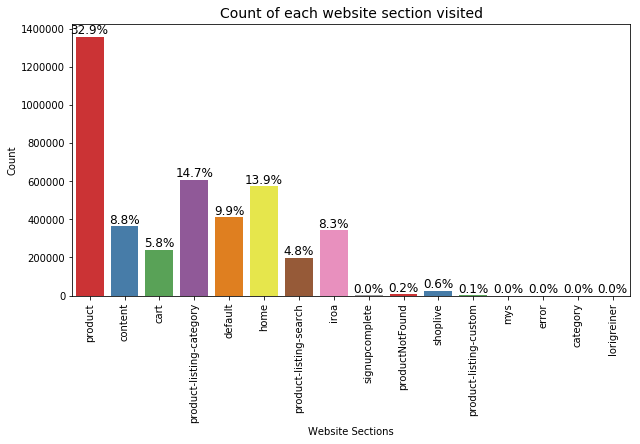

In [53]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='browsing_url', data=Behavior, palette='Set1')



#format_spines(ax, right_border=False)
ncount = len(Behavior)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Count of each website section visited', size=14)
ax.set_xlabel('Website Sections')
ax.set_ylabel('Count')
plt.show()

In [54]:
Behavior['Confirmed'].value_counts()

0    3280108
1     847937
Name: Confirmed, dtype: int64

<Figure size 720x576 with 0 Axes>

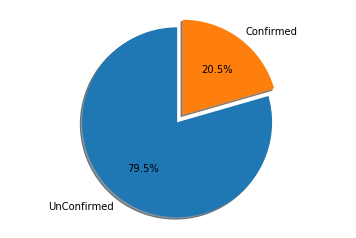

In [55]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize=(10,8))
labels = 'UnConfirmed','Confirmed'
sizes = [ 79.459, 20.54 ]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### In a particular day almost 20% users are buying any product from the site

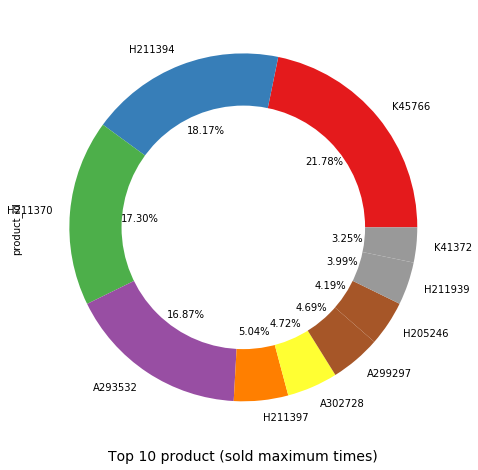

In [57]:
plt.figure(figsize=(10,8))
Conversions['product_id'].value_counts().head(10).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Set1')
plt.xlabel('Top 10 product (sold maximum times)', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

#### The above 10 products account for the highest revenue generation(for the given particular day)

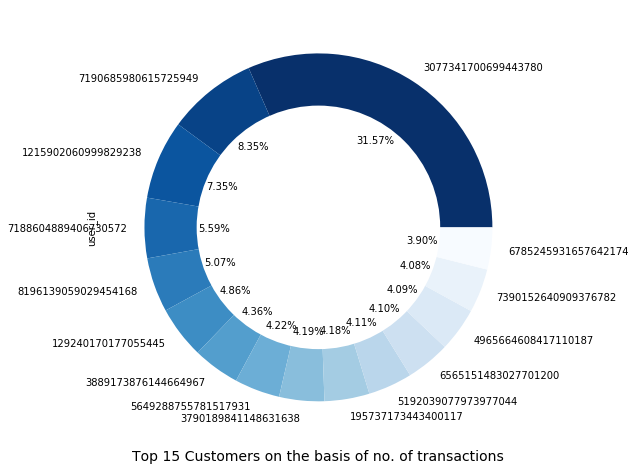

In [59]:
plt.figure(figsize=(10,8))
x=Behavior['user_id'].value_counts().head(15).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Blues_r',subplots=True)
plt.xlabel('Top 15 Customers on the basis of no. of transactions', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

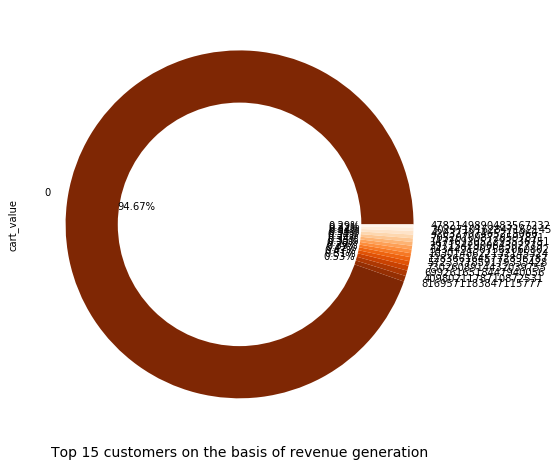

In [13]:
plt.figure(figsize=(10,8))
Conversions.groupby('user_id')['cart_value'].sum().sort_values(ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',pctdistance=.6,cmap='Oranges_r')
plt.xlabel('Top 15 customers on the basis of revenue generation', size=14)
centre_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf() #gcf=get current figure
fig.gca().add_artist(centre_circle)

#### For that particular day we have our 15 most valuable customers

## Create new columns for behavior dataset

In [6]:
Behavior['Time'] = pd.to_datetime(Behavior['timestamp']).dt.time
Behavior['Dates'] = pd.to_datetime(Behavior['timestamp']).dt.date
Behavior['hour'] = pd.to_datetime(Behavior['timestamp']).dt.hour

In [9]:
Behavior.head()

,timestamp,user_id,browsing_url,Confirmed,Time,Dates,hour
101128,2017-07-26 00:47:58.32,544439661706349,product,0,00:47:58.320000,2017-07-26,0
101129,2017-07-26 00:09:03.411,634394594974068,content,0,00:09:03.411000,2017-07-26,0
101130,2017-07-26 00:09:09.116,634394594974068,content,0,00:09:09.116000,2017-07-26,0
101131,2017-07-26 00:11:07.333,634394594974068,content,0,00:11:07.333000,2017-07-26,0
101132,2017-07-26 00:11:29.141,634394594974068,content,0,00:11:29.141000,2017-07-26,0


The number of browsing activities conducted by individual distinct customers  (top 5 most active) is represented below.

In [25]:
Behavior["user_id"].value_counts().head()

3077341700699443780    3106
7190685980615725949     821
1215902060999829238     723
7188604889406730572     550
8196139059029454168     499
Name: user_id, dtype: int64

The sections where a particular customer has spent their activities is also shown below

In [68]:
x=Behavior[Behavior["user_id"]==7190685980615725949]
x.groupby("user_id")["browsing_url"].value_counts()

user_id              browsing_url            
7190685980615725949  product                     743
                     cart                         43
                     iroa                         23
                     home                          6
                     product-listing-category      3
                     content                       1
                     default                       1
                     product-listing-search        1
Name: browsing_url, dtype: int64

## Creating New Columns for Conversions dataset

In [7]:
Conversions['Time'] = pd.to_datetime(Conversions['timestamp']).dt.time
Conversions['Dates'] = pd.to_datetime(Conversions['timestamp']).dt.date
Conversions['hour'] = pd.to_datetime(Conversions['timestamp']).dt.hour

In [8]:
Conversions=Conversions[Conversions['user_id']!=0]
Conversions.head()

,timestamp,user_id,product_id,cart_value,Time,Dates,hour
547,2017-07-26 00:00:15.267,5942997097932061,K43931,157.95,00:00:15.267000,2017-07-26,0
548,2017-07-26 00:26:44.266,23951842225160889,H211370,33.48,00:26:44.266000,2017-07-26,0
549,2017-07-26 00:26:44.361,23951842225160889,H211370,27.48,00:26:44.361000,2017-07-26,0
550,2017-07-26 00:55:37.774,30833658052409950,H211394,44.68,00:55:37.774000,2017-07-26,0
551,2017-07-26 00:10:46.954,33873861847792934,H211800,53.24,00:10:46.954000,2017-07-26,0


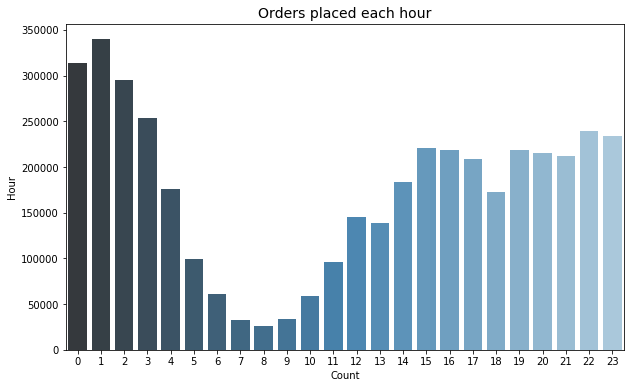

In [71]:
x=Conversions.groupby('hour')['cart_value'].sum()
x=x.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y='cart_value', x='hour', data=x, ci=None,
                 palette='Blues_d')
ax.set_title('Orders placed each hour', size=14)
ax.set_ylabel('Hour')
ax.set_xlabel('Count')

plt.show()

#### From the above graph we could tell that maximum traffic on the site is at night(maximum products are bought in those hours) 

### Model Building and Feature Selection

In [9]:
groupby_Behavior = Behavior.groupby(['user_id','browsing_url']).agg({'timestamp':'count','Confirmed':'mean'})
# timestamp- here the column represents the no. of times each section was viewed by a each customer.

In [74]:
groupby_Behavior.reset_index()

,user_id,browsing_url,timestamp,Confirmed
0,2,content,6,0
1,2,default,1,0
2,2,home,1,0
3,2,product,6,0
4,2,product-listing-category,1,0
...,...,...,...,...
1355844,9223348075878229938,content,1,0
1355845,9223348075878229938,home,2,0
1355846,9223348075878229938,product,1,0
1355847,9223348075878229938,product-listing-category,1,0


In [10]:
pivot_data_con=Behavior.pivot_table(index=['user_id','Confirmed'],columns='browsing_url', values='timestamp',aggfunc='count').fillna(0)

In [44]:
model_data = pivot_data_con.reset_index()
model_data.head()
#create features for each browsing_url using pivot_table (panda function) 
#filled the values with the number of times the user have visited that url.

browsing_url,user_id,Confirmed,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2,0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342391,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420372,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,915687,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
sns.pairplot(model_data_new, hue = 'Confirmed')

<IPython.core.display.Javascript object>

C:\Users\Sazid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sazid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sazid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Sazid\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### since the distribution is not not linearly separable lets start with ensemble techniques such as Random Forest, XGboost & KNN 

### Feature Scaling

In [104]:
feature_scale = [feature for feature in model_data.columns if feature not in ['user_id', 'Confirmed']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(model_data[feature_scale])
scaler.fit(model_data[feature_scale])

model_data_new = pd.concat([model_data[['Confirmed']].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(model_data[feature_scale]), columns= feature_scale)], 
    axis=1)
model_data.head()

browsing_url,user_id,Confirmed,cart,category,content,default,error,home,iroa,lorigreiner,mys,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2,0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342391,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420372,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,915687,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Correlation
### Lets identifying the correlation in the datset 

<IPython.core.display.Javascript object>

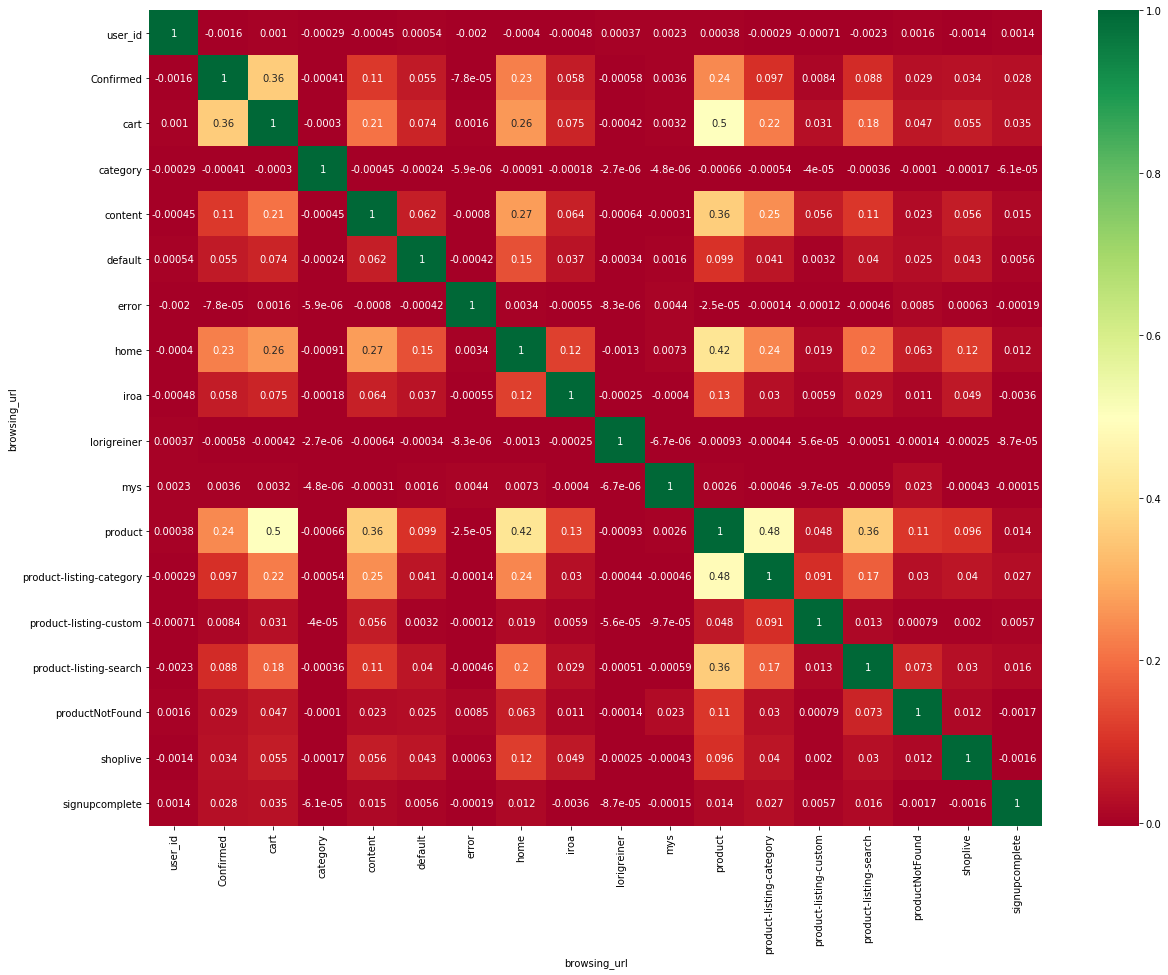

In [105]:
#Lets plot heat map to visualize the data
corrmat = model_data.corr()
top_corr_features = corrmat.index


plt.subplots(figsize=(20,15))
g=sns.heatmap(model_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### There are no highly correlated values observed in the above figure  between two variables and everything act independently.

In [106]:
x=model_data.drop('Confirmed', axis=1)
y=model_data['Confirmed']

In [107]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)

### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,log_loss

Random_Forest =RandomForestClassifier(random_state=42)
Random_Forest.fit(x_train,y_train)

#predicting the test results
y_pred = Random_Forest.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

C:\Users\Sazid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[92169  3026]
 [ 5151  3041]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95195
           1       0.50      0.37      0.43      8192

   micro avg       0.92      0.92      0.92    103387
   macro avg       0.72      0.67      0.69    103387
weighted avg       0.91      0.92      0.92    103387

Accuracy: 0.9209088183233869


In [109]:
    probs_Random_Forest =Random_Forest.predict_proba(x_test)
    probs_Random_Forest

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ]])

Feature Importance for Random_Forest

## XGBOOST

In [110]:
import xgboost

XGBoost = xgboost.XGBClassifier()
XGBoost.fit(x_train,y_train)

#predicting the test results
y_pred = XGBoost.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

C:\Users\Sazid\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[[92630  2565]
 [ 4466  3726]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     95195
           1       0.59      0.45      0.51      8192

   micro avg       0.93      0.93      0.93    103387
   macro avg       0.77      0.71      0.74    103387
weighted avg       0.93      0.93      0.93    103387

Accuracy: 0.9319933840811707


[[87657  7538]
 [ 7504   688]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     95195
           1       0.08      0.08      0.08      8192

   micro avg       0.85      0.85      0.85    103387
   macro avg       0.50      0.50      0.50    103387
weighted avg       0.85      0.85      0.85    103387

Accuracy: 0.8545078201321249


Text(0, 0.5, 'Error Rate')

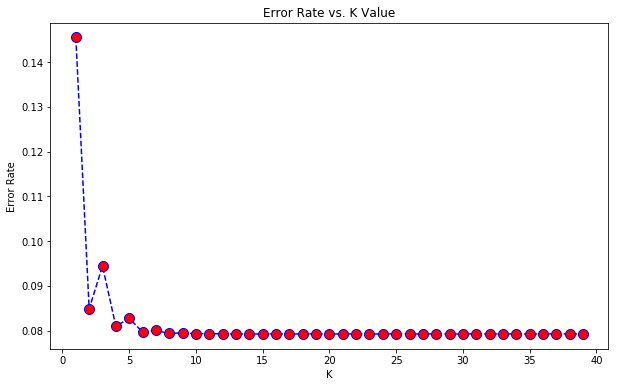

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

#predicting the test results
y_pred = knn.predict(x_test)



print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_test, y_pred))


## Hyperparameter tuning

### Of all the three models XGBOOST has shown high accuracy & so lets perform tuning for higher accuracy

In [130]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [134]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x,y)
random_search.best_estimator_
random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.8min finished


{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [140]:
#lets apply parameters to the model

XGBoost=xgboost.XGBClassifier(min_child_weight=5,
 max_depth= 6,
 learning_rate= 0.1,
 gamma =0.1,
 colsample_bytree= 0.4)

XGBoost.fit(x_train,y_train)

#predicting the test results
y_pred = XGBoost.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))


[[92872  2323]
 [ 4552  3640]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     95195
           1       0.61      0.44      0.51      8192

   micro avg       0.93      0.93      0.93    103387
   macro avg       0.78      0.71      0.74    103387
weighted avg       0.93      0.93      0.93    103387

Accuracy: 0.933502277849246


### there was a slight increase in accuracy compared to base model

## Feature Importance

In [141]:
# extract the numerical values of feature importance from the random search
importances = random_search.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(x.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                   feature
0     0.664389                      cart
1     0.138605                   product
2     0.087517                   default
3     0.051134                      home
4     0.013666  product-listing-category
5     0.013354                      iroa
6     0.009196    product-listing-search
7     0.008956                   content
8     0.004313            signupcomplete
9     0.002791           productNotFound
10    0.002483                  shoplive
11    0.002195                   user_id
12    0.001401    product-listing-custom
13    0.000000                       mys
14    0.000000               lorigreiner
15    0.000000                     error
16    0.000000                  category


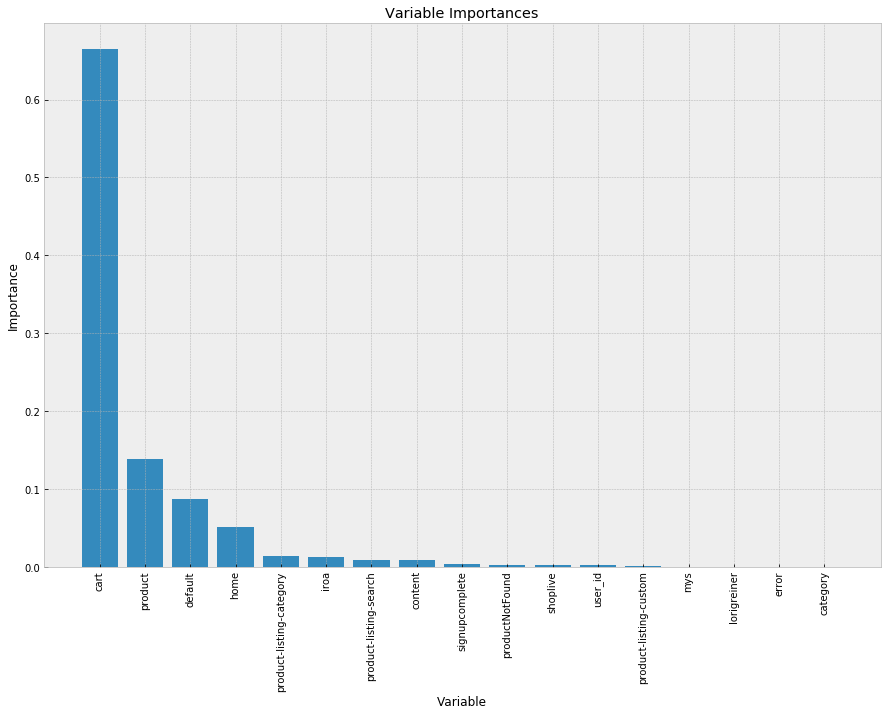

In [142]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## PCA- Principal component analysis

### Lets try to reduce the dimension and see if there is any significant effect on the model

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [144]:
#Applying on XGboost to check the performance
XGBoost=xgboost.XGBClassifier(min_child_weight=5,
 max_depth= 6,
 learning_rate= 0.1,
 gamma =0.1,
 colsample_bytree= 0.4)

XGBoost.fit(x_train,y_train)

#predicting the test results
y_pred = XGBoost.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[92984  2211]
 [ 4874  3318]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     95195
           1       0.60      0.41      0.48      8192

   micro avg       0.93      0.93      0.93    103387
   macro avg       0.78      0.69      0.72    103387
weighted avg       0.92      0.93      0.93    103387

Accuracy: 0.931471074699914


### PCA has not shown any significant increase in accuracy in this scenario